# ETHZ: 227-0966-00L
# Quantitative Big Imaging
# April 16, 2019

## Bimodal experiments

#### Anders Kaestner

In [2]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture

plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})

# Literature / Useful References

### Books
#### General:
- John C. Russ, "The Image Processing Handbook",(Boca Raton, CRC Press)
 - Available [online](http://dx.doi.org/10.1201/9780203881095) within domain ethz.ch (or proxy.ethz.ch / public VPN) 
 
#### Fusion specific:
- Mitchell, H.B., ["Data Fusion: Concepts and Ideas"](https://www.doi.org/10.1007/978-3-642-27222-6), Springer Verlag, 2012.
- Mitchel, H.B., ["Image Fusion - Theories, Techniques and Applications"](https://www.doi.org/10.1007/978-3-642-11216-4), Springer Verlag, 2010.
- Goshtasby, A. Ardeshir, ["Image Registration Principles, Tools and Methods"](10.1007/978-1-4471-2458-0), Springer Verlag, 2012


- *Xiao, G., Bavirisetti, D.P., Liu, G., Zhang, X., ["Image Fusion"](https://www.doi.org/10.1007/978-981-15-4867-3), Springer Verlag, to be published July, 2020*
    

# Some imaging experiments and their challenges

<table>
<col width="400px" />
<tr><th>Hydrology in soil and geology</th><th>Cultural heritage</th></tr>
<tr>
<td>
<center>
<img src="../common/figures/soil.png" style="height:200px" />
</center>        
    
- Segmentation accuracy
- Estimate water content

</td>
<td>
<center>
<img src="../common/figures/buddha_neutron.png" style="height:200px" />
</center>
    
- Segmentation accuracy
- Material classification
        
</td>  
</tr>
<tr><th>Building materials</th><th>Materials science</th></tr>
<tr>
<td>
<center>    
<img src="../common/figures/CapillaryRise.png" style="height:200px" />
</center>        
    
- Estimate water content
- Dimensional changes

</td>
<td>
<center>    
<img src="../common/figures/weld.png" style="height:200px" />
</center>
    
- Penetration power
- Ambiguous readings
        
</td>  
</tr>
</table>


# Why multiple modalities?
Reasons to select or reject a specific imaging method
<table>
    <cols width="600px">
<tr>
<th>
    <center>
    <img src="../common/figures/noun_advantage.svg" style="height:100px">
            </center>
</th>    
<th>
         <center><img src="../common/figures/noun_Disadvantage.svg" style="height:100px"></center>
</th></tr>
<tr><td>
    
- Good transmission
- Good contrast
- Relevant features visible
- Materials can be identified
    
</td><td>
    
- Low transmission
- Low contrast
- Not all features visible
- Ambiguous response
    
</td></tr>
</table>


# The aim of multimodal imaging
### Purpose of multi-modality
Match the advantages of each method against the disadvantages of the other methods to obtain more information than using each method individually.

1. Extend range of operation.
2. Extend spatial and temporal coverage.
3. Reduce uncertainty.
4. Increase reliability.
5. Robust system performance.

<img src="../common/figures/multispectral_goggles.png" style="height:200px" />

# The components of imaging

<img src="../common/figures/imaging_balls.png" style="height:500px" />

# Some considered modalities -  Neutrons and X-rays

<table>
<cols width="700px" />
<tr><th>Neutrons</th><th>X-rays</th></tr>
<tr>
<td>
<center>
<img src="../common/figures/camera_neutrons.png" style="height:200px" />
</center>        
<center>
<img src="../common/figures/periodicN.png" style="height:400px" />
</center>     
</td>
<td>
<center>
<img src="../common/figures/camera_xrays.png" style="height:200px" />
</center>
    <center>
<img src="../common/figures/periodicX.png" style="height:400px" />
</center>
</td>
</tr>
</table>

# Some considered modalities for medical imaging
<img src="../common/figures/MedicalFusion.jpg"/>

[Du et al. 2015](https://doi.org/10.1016/j.neucom.2015.07.160)

# Some considered modalities - Grating interferometry

<table>
<cols width="400px" />
    <tr><th>Transmission</th><th>Differential phase</th><th>Dark field</th></tr>
<tr>
<td>
<center>
<img src="../common/figures/nGI_TI.png" style="height:200px" />
</center>        
</td>
<td>
<center>
<img src="../common/figures/nGI_DPC.png" style="height:200px" />
</center>
    
</td>  
<td>
<center>
<img src="../common/figures/nGI_DFI.png" style="height:200px" />
</center>
</td>
</tr>
</table>

- Data comparable on pixel level
- Non-linear relation between the variables.
- Improved estimation schemes using iterative process
- Physical interpretation/motivation to fuse?


# Some considered modalities - Spectroscopic imaging
<img src="../common/figures/ES_Fe.png" style="height:400px" />

- Material analysis
- Selector calibration

S. Peetermans

# Other modalities and dimensionality
#### The information can also be provided as few localized points 
- Single spots
- Surface information
- Single radiographs vs CT data

#### to provide

- Temperature
- Flowrate
- Pressure


# Image fusion

# What is data fusion?
#### Definition
The theory, techniques and tools which are used for combining sensor data, or data derived from sensory data, into a common representational format.
	
#### Aim
To improve the quality of the information, so that it is, in some sense, better than would be possible if the data sources were used individually.


[Mitchell 2012](https://www.doi.org/10.1007/978-3-642-27222-6)

    
# Fusion approaches - no golden recipe
### Fusion strategies

- __Multivariate fusion:__ All data are combined using the same concept.
- __Augmented fusion:__ Modalities have different functions in the fusion process.
- __Artifact reduction by fusion:__ The second modality can be used to fill in the blanks.
- __Combination:__ A single fusion method may not give the final result - combination 

### Select strategy
The fusion strategy determined by:

- Sample composition 
- Experiment objectives 
- Condition of the data


# Levels of fusion

<table>
    <tr><th>Input</th><th>Output</th><th>Description</th></tr>
    <tr><td>Data</td><td>Data</td><td>Input data is smoothed/filtered/segmented</td></tr>
    <tr><td>Data</td><td>Feature</td><td>The pixels are reduced to features using multiple sources.</td></tr>
    <tr><td>Feature</td><td>Feature</td><td>Input features are reduced in number, <br /> or new features are generated by fusing input features.</td></tr>
    <tr><td>Feature</td><td>Decision</td><td>Input features are fused together to give output decision.</td></tr>
    <tr><td>Decision</td><td>Decision</td><td>Multiple input decisions are fused together <br/>to give a final output decision. e.g. Random forest</td></tr>
</table>

# Image fusion workflow
<img src="../common/figures/imagefusion_process.svg" style="height:800px" />

[Mitchel, 2010](https://www.doi.org/10.1007/978-3-642-11216-4), 
[Goshtasby, 2012](https://www.doi.org/10.1007/978-1-4471-2458-0)

# Catastrophic fusion
#### Definition
The combination perform worse than the individual modalities.


Catastrofic fusion can be caused by:
- Selection of the wrong variables.
- Too complex combination.
- Sensor information canceling each other.

<img src="../common/figures/bad_soup.png" style="height:300px" />

# Image registration
### The process
A series of affine transformations to bring images on the same grid.

<img src="../common/figures/registration.svg" style="height:600px" />


# Registration considerations
Registration is an optimization problem with many local minima.

### Manual or guided registration
- Perform the full transformation manually
- Identify land marks, points, lines, planes
- Provide a coarse preregistration

### Automatic registration 
- Iterative process 
- Metrics
- Multi-modality loose common landmarks 

[Goshtasby, 2012](https://www.doi.org/10.1007/978-1-4471-2458-0)

# Registration and covisualization
Use e.g. VG Studio to 

- Register data sets
- Interactive guided segmentation of the separate data sets.


<table>
<cols width="700px" />
<tr><th>Neutrons</th><th>X-rays</th></tr>
<tr>
<td>
<center>
<img src="../common/figures/swordN.png" style="height:300px" />
</center>            
</td>
<td>
<center>
<img src="../common/figures/swordX.png" style="height:300px" />
</center>
</td>
</tr>
</table>


mannes2015_NXCultHer


# Radiography
Equation system for the transmission 
\begin{eqnarray}
\sum_{i=1}^{N}\,\Sigma_i\,x_i&=&q_N\nonumber\\
\sum_{i=1}^{N}\,\mu_i\,x_i&=&q_X
\end{eqnarray}

- attn coeff known $\rightarrow$ estimate lengths.
- More pixels $\rightarrow$ more materials.


# Computed tomography

- Voxels represent local attenuation coefficients.
- Linear eq system can be set up also here.

$\rightarrow$ Determine subpixel mixing information.


# Bimodal segmentation

# Bimodal Segmentation - Single modality histogram
<img src="../common/figures/overlapping_classesA.png" style="height:500px">


# Two modalities separate

<table>
<cols width="700px" />
<tr><th>Modality A</th><th>Modality B</th></tr>
<tr>
<td>
<center>
<img src="../common/figures/overlapping_classesA.png" style="height:500px" />
</center>            
</td>
<td>
<center>
<img src="../common/figures/overlapping_classesB.png" style="height:500px" />
</center>
</td>
</tr>
</table>


# Bivariate histogram
<img src="../common/figures/bivariate_classes.png" style="height:600px" />

# Example: Roots in soil
\includegraphics[width=\textwidth]{figures/root_slices.pdf}

# Bivariate histogram of roots
\includegraphics[height=0.8\textheight]{figures/root_histogram.png}

# Classification methods
## Data
- Images from $M$ modalities $f_1, \ldots, f_M$
- Registered
- Artifact corrected

## Classes
The $N$ classes are described by: 
$$\begin{eqnarray}
\mathcal{H}_1 : p(\mathbf{\mu}_1,\Sigma_1)\nonumber\\
\mathcal{H}_2 : p(\mathbf{\mu}_2,\Sigma_2)\nonumber\\
\vdots\nonumber\\
\mathcal{H}_N : p(\mathbf{\mu}_N,\Sigma_N)\nonumber
\end{eqnarray}
$$


[Duda, Hart, and Stork, 2001](https://www.wiley.com/en-us/Pattern+Classification%2C+2nd+Edition-p-9781118586006)

# Gaussian mixture model

With Gaussian distribution we can describe the bivariate histogram using:
$$p(\theta)=\sum_{1}^{N} \phi\,\mathcal{N}(\mathbf{\mu}_i,\Sigma_i) $$

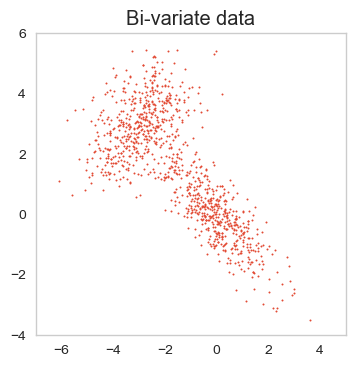

In [3]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C1 = np.array([[1, -0.5], [-0.5, 1]])
C2 = np.array([[1, 0.25], [0.25, 1]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C1), np.dot(np.random.randn(n_samples, 2),C2) + np.array([-3, 3])]

plt.figure(figsize=[4,4])
plt.scatter(X[:,0],X[:,1],0.8)
plt.xlim(-7., 5.),plt.ylim(-4., 6.)
plt.title('Bi-variate data');

In [8]:
def plot_results(X, Y_, means, covariances, title, ax, showShape=True, showCenter=False):
    color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])
    
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        ax.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        if showShape :
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.5)
            ax.add_artist(ell)
            
        if showCenter :
            ax.plot(mean[0],mean[1],'ro')

    ax.set_xlim(-7., 5.)
    ax.set_ylim(-4., 6.)
    ax.set_title(title)


### Gaussian mixture model fitting

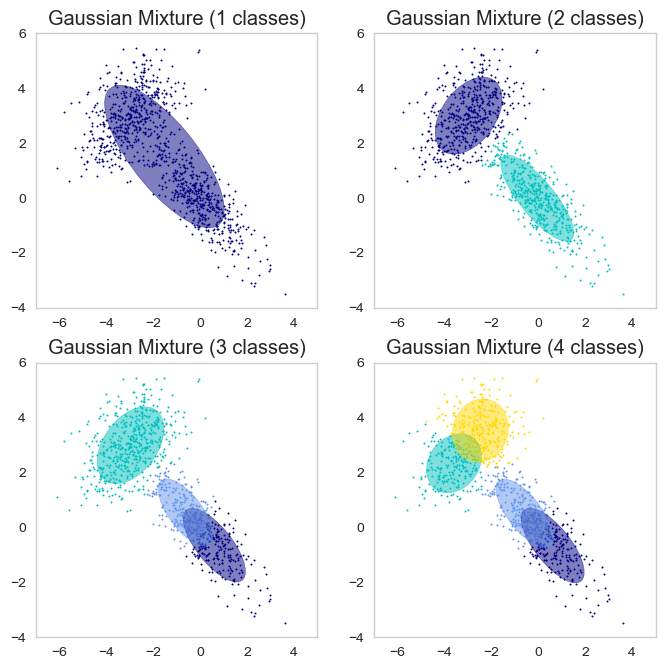

In [7]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
# Fit a Gaussian mixture with EM using five components
for i,ax in zip(np.arange(0,len(axes.ravel())),axes.ravel()) :
    gmm = mixture.GaussianMixture(n_components=i+1, covariance_type='full').fit(X)

    plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             title='Gaussian Mixture ({} classes)'.format(i+1), ax=ax)


# Classification distances 
For a set of multivariate normal distributions $p_i=\mathcal{N}(\mu_i,\Sigma_i)$

We can find the nearest neighbor class using the following distances
#### Euclidean
Distance between two points
$$D_{E}=\sqrt{(x-\mu_1)^T \cdot (x-\mu_1)} $$

#### Mahanalubis
Distance from class $i$ to point $x$
$$D_M=\sqrt{\left(x-\mu_i\right)^T \Sigma_i \left(x-\mu_i\right)}$$

#### Bhattacharia
Distance between two classes 
$$D_B=\frac{1}{8}\left(\mu_1-\mu_2\right)^T \Sigma \left(\mu_1-\mu_2\right) + \frac{1}{2}\ln\left(\frac{|\Sigma|}{\sqrt{|\Sigma_1|\cdot|\Sigma_2|}}\right)\qquad \Sigma=\frac{\Sigma_1+\Sigma_2}{2}$$


Assign the point to the class with shortest distance.


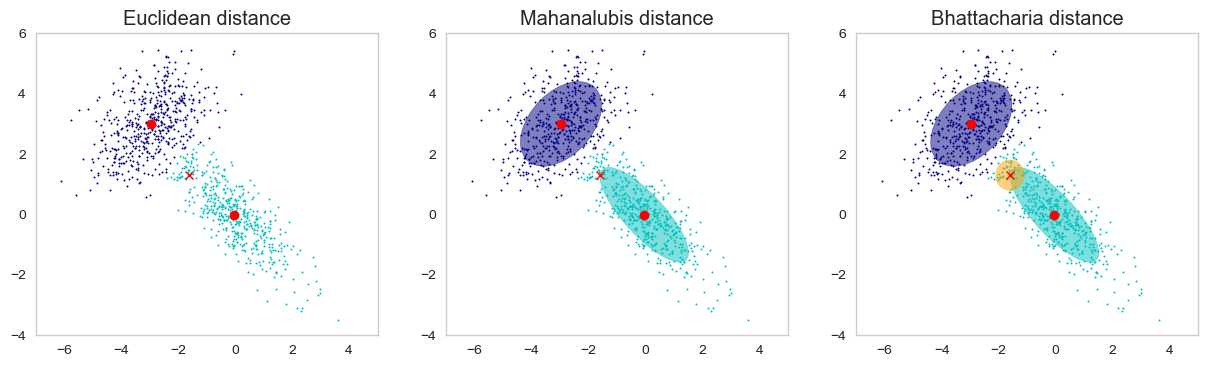

In [16]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(X)
m=[-1.6,1.3]
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))

plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             'Euclidean distance',ax1, showShape=False,showCenter=True)
ax1.plot(-1.6,1.3,'rx')
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             'Mahanalubis distance'.format(2),ax2, showCenter=True)
ax2.plot(-1.6,1.3,'rx')

plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_,
             'Bhattacharia distance'.format(2),ax3, showCenter=True)
v=1
ell = mpl.patches.Ellipse(m, v, v, 0, color='orange')
ell.set_clip_box(ax3.bbox)
ell.set_alpha(0.5)
ax3.add_artist(ell)
ax3.plot(m[0],m[1],'rx');

# Segmentation by Euclidean distance
<img src="../common/figures/root_decision.pdf" style="height:300px" />

kaestner2016_itmnrnx

# Working with attenuation coefficients

### Beer-Lamberts law

$$ I=I_0\,e^{-\frac{\rho}{A}\,N_A\,\sigma\,x} $$
- $\rho$ Material denstity
- $A$ Atomic weight
- $\sigma$ microscopic cross section
     - Probability of interaction
     - modality dependent

- $x$ propagation length

### Equation system

$$
\begin{eqnarray}
\sum_{i=1}^{N}\,\Sigma_i\,x_i&=&q_N\nonumber\\
\sum_{i=1}^{N}\,\mu_i\,x_i&=&q_X
\end{eqnarray}
$$
- attn coeff known $\rightarrow$ estimate lengths.
- More pixels $\rightarrow$ more materials.

